In [14]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import utility

reload(utility)
from utility import *

from scipy.optimize import curve_fit
from SecondaryValue import SecondaryValue
import pandas as pd

In [3]:
area = 26  # cm^2
int_ein = 100e-3 # w/cm^2

In [19]:
ccurves = load_and_analyze([
        ('a', '3x3_hell', 6),
        ('b_1', '3x3_schaltung_1', 6),
        ('b_2', '3x3_schaltung_2', 6),
        ('b_31', '3x3_schaltung_3', 6),
        ('b_41', '3x3_schaltung_4', 6),
        ('c_1', '3x3_verschattung_1', 6),
        ('c_2', '3x3_verschattung_2', 6),
        ('c_3', '3x3_verschattung_3', 6),
        ('d_1', 'huge_hell', 13),
        ('d_2', 'huge_verbraucher', 13)],
        int_ein,
        area=area,
        formatter='../messungen/191114_OM_VB/3_{}.dat'.format,
        columns=['desc', 'curve', 'area', 'j_c', 'u_cc', 'ff', 'eta', 'p_mlp', 'u_mlp', 'i_mlp'])


# Plot all ccurves

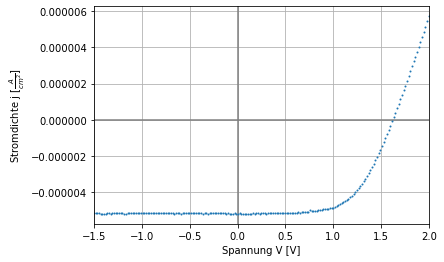

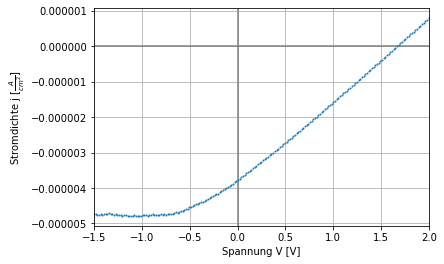

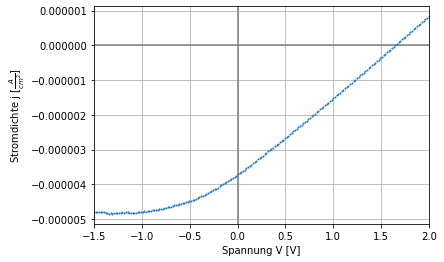

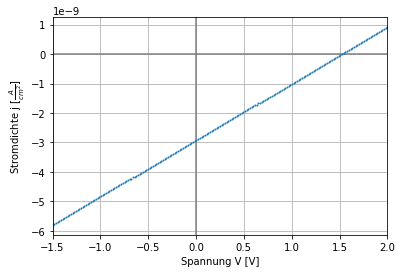

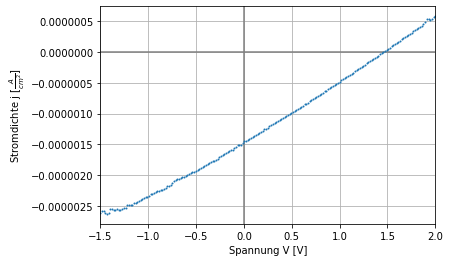

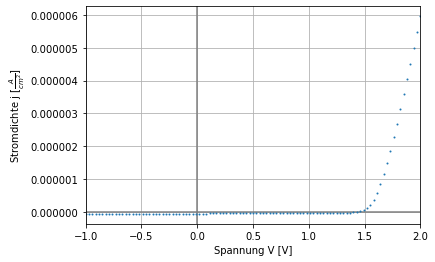

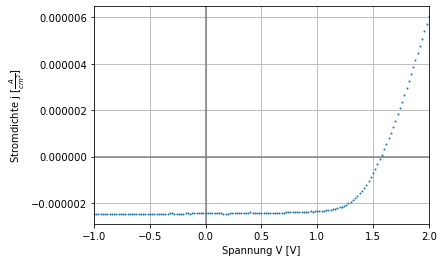

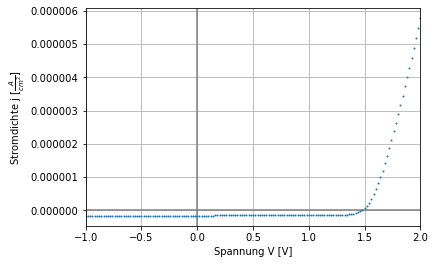

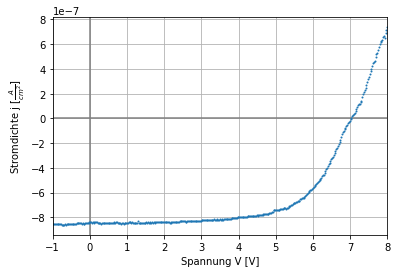

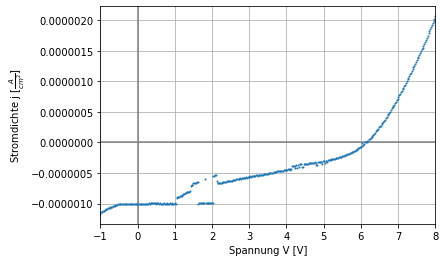

In [20]:
for _, curve in ccurves.iterrows():
    plot_ccurve(curve['curve'], area=area * curve['area'], save=f'C/{curve["desc"]}.pdf')

In [16]:
ccurves.loc['huge_hell']

desc                                             huge_hell
curve    [[-1.0, -0.1947314], [-0.9775, -0.1942969], [-...
area                                                    13
j_c                                              0.0147647
u_cc                                               7.02243
ff                                                0.653348
eta                                               0.677416
p_mlp                                             0.880641
u_mlp                                               5.3225
i_mlp                                  -0.1654561994540209
Name: huge_hell, dtype: object

In [18]:
ccurves

,desc,curve,area,j_c,u_cc,ff,eta,p_mlp,u_mlp,i_mlp
3x3_hell,3x3_hell,"[[-1.5, -0.5417189], [-1.4825, -0.5438931], [-...",6,0.090875,1.621324,0.603224,0.888776,0.533266,1.136215,-0.4693348714285935
3x3_schaltung_1,3x3_schaltung_1,"[[-1.5, -0.4987553], [-1.4825, -0.4996429], [-...",6,0.066417,1.668620,0.260355,0.288535,0.173121,0.831189,-0.20828160714286892
3x3_schaltung_2,3x3_schaltung_2,"[[-1.5, -0.5053194], [-1.4825, -0.5066954], [-...",6,0.065349,1.649947,0.259787,0.280107,0.168064,0.829593,-0.20258660000002998
3x3_schaltung_3,3x3_schaltung_3,"[[-1.5, -0.0006112836], [-1.4825, -0.000607707...",6,0.000051,1.527599,0.250472,0.000197,0.000118,0.757500,-0.00015580096971469002
3x3_schaltung_4,3x3_schaltung_4,"[[-1.5, -0.2743212], [-1.4825, -0.2720917], [-...",6,0.025509,1.462855,0.261500,0.097580,0.058548,0.740000,-0.07911919453640125
3x3_verschattung_1,3x3_verschattung_1,"[[-1.0, -0.006214225], [-0.97, -0.006181907], ...",6,0.000830,1.426593,0.654127,0.007744,0.004647,1.190000,-0.0039047434763039633
3x3_verschattung_2,3x3_verschattung_2,"[[-1.0, -0.2602277], [-0.98, -0.2602689], [-0....",6,0.042794,1.571996,0.687776,0.462683,0.277610,1.219997,-0.22754981766503463
3x3_verschattung_3,3x3_verschattung_3,"[[-1.0, -0.01750273], [-0.98, -0.01755973], [-...",6,0.002743,1.476685,0.756062,0.030622,0.018373,1.259999,-0.014582063482794307
huge_hell,huge_hell,"[[-1.0, -0.1947314], [-0.9775, -0.1942969], [-...",13,0.014765,7.022427,0.653348,0.677416,0.880641,5.322500,-0.1654561994540209
huge_verbraucher,huge_verbraucher,"[[-1.0, -0.2670641], [-0.9775, -0.258778], [-0...",13,0.017648,6.105162,0.292938,0.315622,0.410309,3.792504,-0.10818945820239775
